# Importing Modules and Libraries Required

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
%matplotlib inline

# Classifiers

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

#Data pre-processing Libraries

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import KMeansSMOTE
import miceforest as miceforest

# Other libraries

import sys
import warnings
warnings.filterwarnings('ignore')

# Data Importing and Cleaning

In [2]:
X = pd.read_csv('TrainingData.csv')
X.replace(["C", "L"], [0,1], inplace=True) #Replacing Credit and Lending Card with [0,1]
X = X.drop(columns=['application_key'])
X = X.apply(pd.to_numeric, errors='coerce') #Convering missing values place-holders like missing, na, N/A etc. into NaN

In [3]:
y = X['default_ind']

# Mice Imputation

In [4]:
kernel = miceforest.ImputationKernel(data=X, save_all_iterations=True, random_state=8) #Kernal Instance for mice imputer
kernel.mice(6,verbose=True) #Training the kernal
new_data_imputed = kernel.impute_new_data(X) #Imputing

X = new_data_imputed.complete_data(0) #Return a completed dataset

Initialized logger with name mice 1-6
Dataset 0
1  | mvar19 | mvar34 | mvar28 | mvar38 | mvar20 | mvar29 | mvar5 | mvar4 | mvar3 | mvar10 | mvar43 | mvar33 | mvar42 | mvar36 | mvar50 | mvar51 | mvar1 | mvar2 | mvar39 | mvar7 | mvar37 | mvar25 | mvar32 | mvar44 | mvar13 | mvar26 | mvar9 | mvar27 | mvar12 | mvar18 | mvar17 | mvar16 | mvar24 | mvar6 | mvar8 | mvar21 | mvar46 | mvar22 | mvar15 | mvar35 | mvar30 | mvar23 | mvar45 | mvar11 | mvar41 | mvar31 | mvar40
2  | mvar19 | mvar34 | mvar28 | mvar38 | mvar20 | mvar29 | mvar5 | mvar4 | mvar3 | mvar10 | mvar43 | mvar33 | mvar42 | mvar36 | mvar50 | mvar51 | mvar1 | mvar2 | mvar39 | mvar7 | mvar37 | mvar25 | mvar32 | mvar44 | mvar13 | mvar26 | mvar9 | mvar27 | mvar12 | mvar18 | mvar17 | mvar16 | mvar24 | mvar6 | mvar8 | mvar21 | mvar46 | mvar22 | mvar15 | mvar35 | mvar30 | mvar23 | mvar45 | mvar11 | mvar41 | mvar31 | mvar40
3  | mvar19 | mvar34 | mvar28 | mvar38 | mvar20 | mvar29 | mvar5 | mvar4 | mvar3 | mvar10 | mvar43 | mvar33 | mvar42 |

In [5]:
X = X.drop(columns=['default_ind'])

# SMOTE class balancing

In [6]:
sm = SMOTE(random_state=42, sampling_strategy=1.0) #Creating SMOTE Instance
X_smote, y_smote = sm.fit_resample(X, y) #Re-sampling

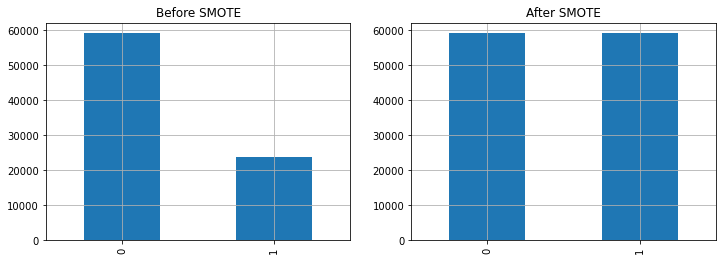

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[12,4])
y.value_counts().plot.bar(grid=True, ax=axes[0], title="Before SMOTE")
y_smote.value_counts().plot.bar(grid=True, ax=axes[1], title="After SMOTE")
plt.show()

# Voting Classifier with XGBoost & LGBM

In [8]:
estimators = []

model_1 = XGBClassifier(n_estimators=130,
                      
                      learning_rate=0.05,
                      objective='binary:logistic',
                      subsample=0.5,         
                      colsample_bytree=0.5,  
                      scale_pos_weight=2.47, 
                      random_state=123)
estimators.append(('xgb', model_1))

model_2 = LGBMClassifier(n_estimators=130,
                       
                       learning_rate=0.05, 
                       objective='binary',
                       subsample=0.5,         
                       colsample_bytree=0.5, 
                       scale_pos_weight=2.47,
                       random_state=123)
estimators.append(('lgb', model_2))

# Voting Classifier
clf = VotingClassifier(estimators, voting='soft')

In [9]:
model = clf.fit(X_smote, y_smote) #Training the model

# Preparing and Predicting on the Test Data

In [10]:
test = pd.read_csv('testX.csv')
test.replace(["C", "L"], [0,1], inplace=True) #Replacing Credit and Lending Card with [0,1]
test = test.drop(columns=['application_key'])
test = test.apply(pd.to_numeric, errors='coerce') #Convering missing values place-holders like missing, na, N/A etc. into NaN

# Imputation
kernel_test = miceforest.ImputationKernel(data=test, save_all_iterations=True, random_state=8) #Kernal Instance for mice imputer
kernel_test.mice(6,verbose=True) #Training the kernal
new_test_imputed = kernel_test.impute_new_data(test) #Imputing
test = new_test_imputed.complete_data(0) #Return a completed test set

Initialized logger with name mice 1-6
Dataset 0
1  | mvar19 | mvar3 | mvar4 | mvar5 | mvar10 | mvar28 | mvar29 | mvar34 | mvar20 | mvar38 | mvar43 | mvar33 | mvar42 | mvar36 | mvar50 | mvar1 | mvar51 | mvar2 | mvar39 | mvar7 | mvar25 | mvar37 | mvar32 | mvar44 | mvar13 | mvar26 | mvar9 | mvar27 | mvar12 | mvar18 | mvar17 | mvar16 | mvar24 | mvar6 | mvar8 | mvar21 | mvar46 | mvar22 | mvar15 | mvar35 | mvar30 | mvar23 | mvar45 | mvar11 | mvar41 | mvar31 | mvar40
2  | mvar19 | mvar3 | mvar4 | mvar5 | mvar10 | mvar28 | mvar29 | mvar34 | mvar20 | mvar38 | mvar43 | mvar33 | mvar42 | mvar36 | mvar50 | mvar1 | mvar51 | mvar2 | mvar39 | mvar7 | mvar25 | mvar37 | mvar32 | mvar44 | mvar13 | mvar26 | mvar9 | mvar27 | mvar12 | mvar18 | mvar17 | mvar16 | mvar24 | mvar6 | mvar8 | mvar21 | mvar46 | mvar22 | mvar15 | mvar35 | mvar30 | mvar23 | mvar45 | mvar11 | mvar41 | mvar31 | mvar40
3  | mvar19 | mvar3 | mvar4 | mvar5 | mvar10 | mvar28 | mvar29 | mvar34 | mvar20 | mvar38 | mvar43 | mvar33 | mvar42 |

In [11]:
y_pred = model.predict(test) #Final Predictions

$$
Thank You
$$